In [3]:
# Goal: Compare the vph=vsc timing estimates purely based on Arnett
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u
import astropy.constants as aconst

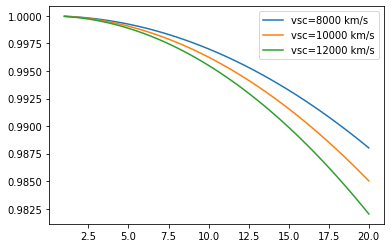

In [6]:
# See notes from 2022-10-16/19odp/Model/Arnett
# based on A=0 (uniform)

t = np.linspace(1, 20)
tm = 19
#vsc = 9000
c = aconst.c.cgs.value * u.cm.to(u.km)
alpha = 9.87

for vsc in [8000, 10e3, 12e3]:
    ratio = 1 - 4/alpha * vsc/c * (t/tm)**2
    plt.plot(t, ratio, label='vsc=%d km/s' % vsc)
plt.legend()

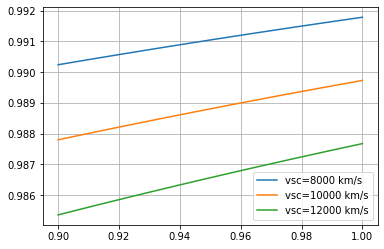

In [10]:
def eta(x, A):
    return np.exp(1.723 * A * x)

xph = np.linspace(0.9, 1)
A = 1
alpha = 2.57
t = 20
for vsc in [8000, 10e3, 12e3]:
    ratio = 1 - 4/alpha/eta(xph, A) * vsc/c * (t/tm)**2
    plt.plot(xph, ratio, label='vsc=%d km/s' % vsc)
plt.legend();
plt.grid();

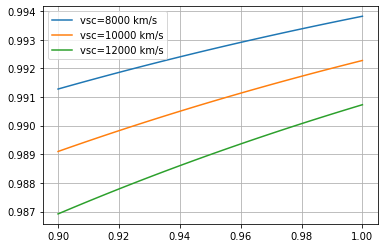

In [11]:
def eta(x, A):
    return np.exp(1.723 * A * x)

xph = np.linspace(0.9, 1)
A = 2
alpha = 0.61
t = 20
for vsc in [8000, 10e3, 12e3]:
    ratio = 1 - 4/alpha/eta(xph, A) * vsc/c * (t/tm)**2
    plt.plot(xph, ratio, label='vsc=%d km/s' % vsc)
plt.legend();
plt.grid();

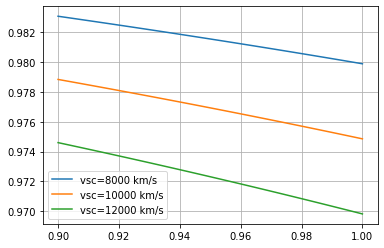

In [12]:
def eta(x, A):
    return np.exp(1.723 * A * x)

xph = np.linspace(0.9, 1)
A = -1
alpha = 32.931
t = 20
for vsc in [8000, 10e3, 12e3]:
    ratio = 1 - 4/alpha/eta(xph, A) * vsc/c * (t/tm)**2
    plt.plot(xph, ratio, label='vsc=%d km/s' % vsc)
plt.legend();
plt.grid();

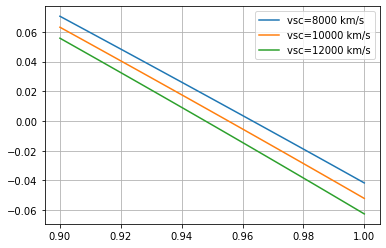

In [14]:
def eta(x, A):
    return np.exp(1.723 * A * x)

xph = np.linspace(0.9, 1)
A = -2
alpha = 89.007
t = 20
for vsc in [8000, 10e3, 12e3]:
    ratio = 1 - 4/alpha/eta(xph, A) * vsc/c * (t/tm)**2
    plt.plot(xph, ratio-xph, label='vsc=%d km/s' % vsc)
plt.legend();
plt.grid();

In [21]:
# Liu+2018

mej = 8 * u.Msun.to(u.g)
r0 = 3 * u.Rsun.to(u.cm)

A = -1
I_M = 0.0973

rho0 = mej/4/np.pi/r0**3/I_M
print("rh0: ", rho0)

t = np.linspace(3, 30) * 24 * 3600

k = 0.1
vsc = 10e3 * u.km.to(u.cm)

tau_tot = k*rho0 * r0 * (1-np.exp(A*1.723))/(-A*1.723) * (r0/vsc/t)
print(np.log10(tau_tot))

x_ph = 1/(1.723*A) * np.log( 2*(1-np.exp(A*1.723))/3/tau_tot + np.exp(A*1.723) )
print(x_ph)

rh0:  1.4310124718587294
[7.0594015  6.98616958 6.92352278 6.86878399 6.82017865 6.77646972
 6.73676035 6.70037956 6.66681221 6.63565423 6.60658278 6.57933586
 6.55369793 6.52948949 6.50655953 6.48477975 6.46404027 6.44424621
 6.42531512 6.4071749  6.3897621  6.37302062 6.35690062 6.34135761
 6.3263517  6.31184702 6.29781114 6.28421473 6.27103108 6.25823588
 6.24580689 6.23372373 6.22196768 6.21052148 6.19936922 6.18849619
 6.17788875 6.16753421 6.15742082 6.14753759 6.13787427 6.1284213
 6.1191697  6.11011109 6.10123757 6.09254172 6.08401659 6.07565558
 6.0674525  6.0594015 ]
[0.99999984 0.99999982 0.99999979 0.99999976 0.99999973 0.9999997
 0.99999967 0.99999965 0.99999962 0.99999959 0.99999956 0.99999953
 0.9999995  0.99999947 0.99999945 0.99999942 0.99999939 0.99999936
 0.99999933 0.9999993  0.99999927 0.99999925 0.99999922 0.99999919
 0.99999916 0.99999913 0.9999991  0.99999907 0.99999905 0.99999902
 0.99999899 0.99999896 0.99999893 0.9999989  0.99999888 0.99999885
 0.99999882 0.9

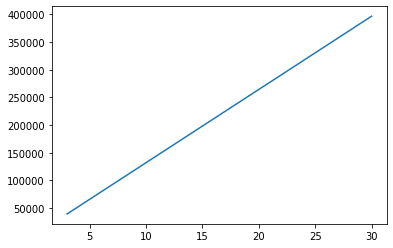

In [23]:
# Liu+2018 vph/vmax

mej = 8 * u.Msun.to(u.g)
r0 = 3 * u.Rsun.to(u.cm)

A = -1
I_M = 0.333333

rho0 = mej/4/np.pi/r0**3/I_M
k = 0.1

t = np.linspace(3, 30) * 24 * 3600

vsc = 10e3 * u.km.to(u.cm)

r0 = 3 * u.Rsun.to(u.cm)
rt = r0 + vsc*t

eta = 1

ratio = 4/3 * eta * rt/r0 * 1/k/rho0
plt.plot(t/24/3600, ratio)

[2453.34803351 1751.0370477  1312.20508542 1019.82143845  815.29254373
  666.64651748  555.2350484   469.58614704  402.32829919  348.54962299
  304.87493548  268.92296514  238.97475064  213.76428467  192.34248583
  173.98654975  158.13816823  144.36056829  132.30809345  121.70431051
  112.32601645  103.99139588   96.5511421    89.88172346   83.88022255
   78.4603419    73.54928428   69.08529542   65.01571317   61.29540716
   57.88552224   54.75245974   51.86704672   49.20385436   46.74063581
   44.45786007   42.33832363   40.36682539   38.52989337   36.81555393
   35.21313615   33.7131054    32.30692116   30.98691518   29.74618674
   28.57851224   27.47826705   26.4403576    25.46016238   24.53348034]


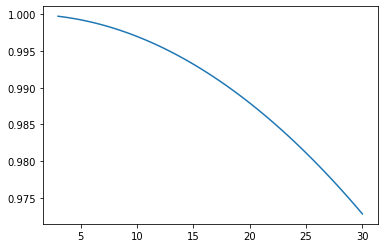

In [28]:
# Liu+2018 uniform xph(t)

mej = 5 * u.Msun.to(u.g)
k = 0.1

I_M = 0.33333

vsc = 12e3 * u.km.to(u.cm)

t = np.linspace(3, 30) * 24 * 3600

tau_total = k*mej/4/np.pi/I_M / vsc**2 / t**2
print(tau_total)

xph = 1 - 2/3/tau_total

plt.plot(t/24/3600, xph)